In [1]:
import rasterio as rio
import earthpy.plot as ep
import matplotlib.pyplot as plt
import matplotlib.colors
import geopandas as gpd
import os

import earthpy.spatial as es

from rasterio.plot import plotting_extent

In [15]:
orig_path ='../MODIS/Visualisation_Demo'
    
aug_path ='../MODIS/augmented_demo'

grid_path ='../grid_elev_etak/estonia_boundary3301.shp'

image_wc = '.tif'

lst_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['royalblue',"aqua","yellow",'orange',"red","crimson"])

In [3]:
grid_extent = gpd.read_file(grid_path)
                            
grid_extent

,GID_0,NAME_0,centroid,centriody,geometry
0,EST,Estonia,25.549703,58.670634,"MULTIPOLYGON (((456706.498 6404490.537, 456704..."


In [4]:
stacks = []

augmented = []

originals = []


dates = ['2010-08-01','2014-08-10','2018-07-19']

for i in range(3) :
    
    aug = os.path.join(aug_path,(dates[i]+image_wc) ).replace('\\','/')
    
    augmented.append(aug)
                     
    orig = os.path.join(orig_path,(dates[i]+image_wc) ).replace('\\','/')
    
    originals.append(orig)
    




aug_st, aug_meta = es.stack(augmented) #stack of gap filled 


orig_st, orig_meta = es.stack(originals,nodata=0) #stack of original images

aug

'../MODIS/augmented_demo/2018-07-19.tif'

In [9]:
#plot functions

def orig (stack,title,ax,cmap):
    plt.rcParams['image.origin'] ='upper'
    axes =ep.plot_bands(stack,title=title,ax=ax,cmap=cmap,vmin=10,vmax=35)
    #axes.figure.axes[-1].tick_params(labelsize=8)
    return axes


def aug (stack,title,ax,cmap):
    plt.rcParams['image.origin'] ='lower'
    axes =ep.plot_bands(stack,title=title,ax=ax,cmap=cmap,vmin=10,vmax=35)
    
    
    return axes

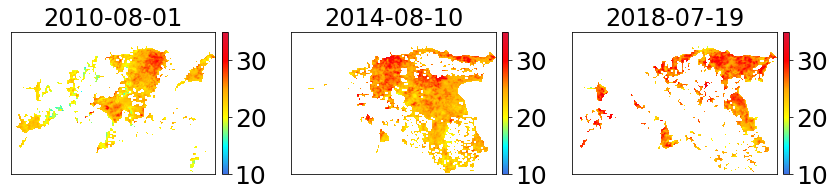

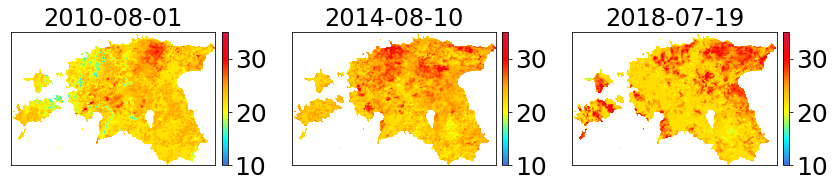

In [16]:
dates = ['2010-08-01','2014-08-10','2018-07-19']

plt.rcParams['figure.figsize'] = [20,25]
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.labelsize'] =40
matplotlib.rcParams.update({'font.size': 20})

#fig, axs = plt.subplots(2,) #create a figure with 2 subplots
fig, ax = plt.subplots(2,1,figsize=(20,10),dpi=600)
ax1, ax2 = ax.flatten() #pass axes objects to list

#print(axs)

plt.close() #stop fig from showing

#ep.plot_bands(stack=orig_st,title=dates,cmap=cmap,ax=axs[0,],vmin=15,vmax=40) #ax = axis object in axs


ax1 = orig(stack=orig_st,title=dates,ax=ax1,cmap=lst_cmap)

ax2 = aug(stack=aug_st,title=dates,ax=ax2,cmap=lst_cmap)

plt.show()